In [1]:
# We are going to perform the time evolution of an ising model of a single spin
# This will be done using the Lie-Trotter-Suzuki formula in order to approximate the exponential

# This setups everything

import numpy as np
from qiskit import *
%matplotlib inline

In [125]:
# We create a register with just 1 qubit

q = QuantumRegister(1,'q')

circ = QuantumCircuit(q)

In [126]:
# We can start aplying gates

# We set the initial state as a spin up pointing in the x direction

circ.h(q[0])

# Now we apply the time evolution operator. We set c = 0.01, h = 20, t0 = 100
c = 0.1 
hj = 20 
tf = 0

dt = 0.05 # prueba2 : dt = 0.2
#dt = 0.5
t = -250 # setting t = -2000 worked great ; trying to find a lower bound // the following tests set c = 0.1
            # t=-2000 actually works great but t = -1000 doesnt -> why ?
            # t = -1500 is ok too / t = -1100 is not
        
# Some kind of phase transition ? Setting t = -1500 & c = 0.01 doesnt seem to work
# Setting t = -15000 & c = 0.01 while dt = 0.5 fails
while t<tf:
    
    t1 = t + dt
  #  for i in range(1,N):
    circ.rz(hj/2*(t-t1),q[0])
    circ.rx(c/2*(t1*t1-t*t),q[0])
    circ.rz(hj/2*(t-t1),q[0])
      #      circ.rx(-c*(t*t-t1*t1)/(2*N),q[0])
       #     circ.rz(-hj*(t-t1)/N,q[0])
    t = t1 

In [83]:
# We draw the circuit (it is not a very beatiful one)

#circ.draw()

In [84]:
from qiskit import BasicAer
from qiskit.visualization import plot_bloch_multivector

# Lets simulate the final state

backend = BasicAer.get_backend('statevector_simulator') #->basically this runs the circuit
job = execute(circ,backend)
result = job.result()

outputstate = result.get_statevector(circ,decimals=3)
#print(outputstate)
plot_bloch_multivector(outputstate).savefig('prueba1t=0.png')



In [127]:
c = ClassicalRegister(1,'c')

# We now create a Quantum Circuit for this register

measure = QuantumCircuit(q,c)

# This simply draws a barrier in the circuit

measure.barrier(q)

# And this performs the measurement in each qubit

measure.measure(q,c)

# Now we can add the circuits and draw the final result

qc = circ + measure
#qc.draw(output='latex')

In [128]:
backend_sim = BasicAer.get_backend('qasm_simulator')

# Now we execute the circuit on the qasm simulator. We repeat the experiment
# 2048 times

job_sim = execute(qc,backend_sim,shots=1024)

# Finally we grab the results

result_sim = job_sim.result()

In [129]:
counts = result_sim.get_counts(qc) # The function get_counts(circuit) lets us access the counts
print(counts)

{'1': 84, '0': 940}


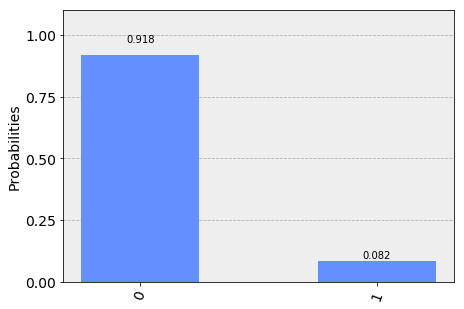

In [130]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [111]:
from qiskit import IBMQ

# Im linking this program with my test account by using my token:

IBMQ.save_account('5acf5b9794cd56709a04e932a3ded43fbcdb316c1621e8962ec93352a182ef269ce5b3158889c267dc04fa207e71abb60b0d5c11e69a71602679dbb5a5c05364')

C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\credentials\configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [99]:
IBMQ.load_accounts(hub=None)

C:\Users\User\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [100]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]

In [113]:
# We will now find the device with the least busy queue that can support
# our program

from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits<10 and 
                                    not x.configuration().simulator)

backend = least_busy(large_enough_devices)
print("The best backend is "+ backend.name())

The best backend is ibmqx4


In [131]:
from qiskit.tools.monitor import job_monitor
shots = 1024
max_credits = 3

job_exp = execute(qc,backend = backend, shots = shots, max_credits = max_credits)
job_monitor(job_exp)

Job Status: job has successfully run


In [132]:
result_exp = job_exp.result()

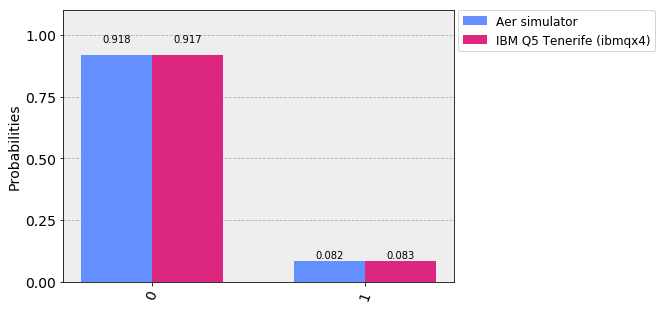

In [133]:
counts_exp = result_exp.get_counts(qc)
legend = ['Aer simulator','IBM Q5 Tenerife (ibmqx4)']
plot_histogram([counts,counts_exp],legend=legend)#.savefig('fig32.png')